### Basic Analysis of a dataset with data minipulation and visulaiztion

data uses NYC Flight13 dataset

#load the datasets
#dimensions of flights dataset in rows and columns
#column names of flights
#print types of each variable in the dataset
#select all unique destinations 
#view initial 10 rows in the dataset
#unique origin airports
#select the subset of the data where the destination is Seattle. Count such flights.

#unique airlines in the dataset
#carriers flying to Seattle
#Subset the dataset with destination as Seattle and then find unique Airplanes(using tailnums)

#calculate the mean by subsetting the data with destination as Seattle
#Make a crosstabulation of the flights coming from NYC to SEA
#Calculate the proportion by dividing the sum

#creating a groupby table which is indexed by Month and Day and not year because the data is for 2013 year
#the arrival delay is then aggregated for every date

#select the the date for largest average arrival delay
#groupby the number of flights only if there is departure delay (departure delay is greater than 0)
#retrieve the date for the maximum number of delayed flights



#plot the data by averaging the departure delay by months
#set the x-axis label to months
#set the x-axis to not plot 0 month
#increase the number of visible ticks to individual months to show all months
#set the y-label to average delay 
#set the limits of y-axis
#set the grid to true
#plot legends

In [144]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib

import sklearn
import matplotlib.pyplot as plt

from pandas import Series
#inline matplotlib
%matplotlib inline 

#load the datasets
flights_df= pd.read_csv('flights.csv')
flights_df = flights_df[pd.notnull(flights_df)]
weather_df = pd.read_csv('weather.csv')



# flights_df= pd.read_csv('flights.csv',encoding='utf-8', quotechar='"', delimiter=',') 

# #this gets rid of the 'u'
# def strip_non_ascii(string):
#     ''' Returns the string without non ASCII characters'''
#     stripped = (c for c in string if 0 < ord(c) < 127)
#     return ''.join(stripped)


In [106]:
#dimensions of flights dataset in rows and columns
print flights_df.shape

(336776, 17)


In [107]:


# flights_df.columns = [strip_non_ascii(x) for x in flights_df.columns]

#column names of flights
print flights_df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')


In [108]:
#print types of each variable in the dataset
print flights_df.dtypes

Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [109]:
#select all unique destinations 
flights_df.dest.unique()


array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [110]:
#view initial 10 rows in the dataset
flights_df.head(10)


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [111]:
#unique origin airports
flights_df.origin.unique()


array(['EWR', 'LGA', 'JFK'], dtype=object)

In [112]:
#select the subset of the data where the destination is Seattle. Count such flights.
flights_df[(flights_df.dest == 'SEA')].dest.count()

3923

In [117]:
#unique airlines in the dataset
(flights_df.carrier.unique()).size


16

In [119]:
#carriers flying to Seattle
(flights_df[(flights_df.dest == 'SEA')].carrier.unique()).size

5



### There are overall 16 unique carriers listed in the dataset. Of these 16 carriers only 5 carriers fly to Seattle from NYC.

(c) How many unique air planes fly from NYC to Seattle?

In [200]:
#Subset the dataset with destination as Seattle and then find unique Airplanes(using tailnums)
sum(~pd.isnull(flights_df[(flights_df.dest == 'SEA')].tailnum.unique()))

935

In [206]:
#calculate the mean by subsetting the data with destination as Seattle
flights_df[(flights_df.dest=='SEA')].arr_delay.mean()

-1.0990990990990992

The average arrival delay of the flights flying from NYC to Seattle is -1.099. This can be approximated to -1.10. A negative value means that on average the flights flying from NYC to Seattle arrive "early" by 1.10 mins

(e) What proportion of flights to Seattle come from each NYC airport?

In [218]:
#Make a crosstabulation of the flights coming from NYC to SEA
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
#pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, dropna=True, normalize=False)[source]¶
flights_toSEA = pd.crosstab(index=flights_df[(flights_df.dest == 'SEA')].origin, columns = "count")
flights_toSEA

col_0,count
origin,
EWR,1831
JFK,2092


In [220]:
#Calculate the proportion by dividing the sum

flights_toSEA/flights_toSEA.sum()

col_0,count
origin,
EWR,0.466735
JFK,0.533265


 No flights fly from LGA so that accounts to 0.0
 The proportion of flights flying from EWR to SEA is 0.467
 The proportion of flights flying from JFK to SEA is 0.533

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [256]:
#creating a groupby table which is indexed by Month and Day and not year because the data is for 2013 year
#the arrival delay is then aggregated for every date
arr_delay_by_date = flights_df.groupby(['month', 'day'])['arr_delay'].mean()

In [257]:
arr_delay_by_date

month  day
1      1      12.651023
       2      12.692888
       3       5.733333
       4      -1.932819
       5      -1.525802
       6       4.236429
       7      -4.947312
       8      -3.227578
       9      -0.264278
       10     -5.898816
       11     -4.762268
       12    -13.016153
       13     14.931846
       14      3.640303
       15      0.425653
       16     34.247362
       17      6.492896
       18      1.841758
       19     -8.526080
       20      3.740077
       21      6.315965
       22     12.276836
       23      6.917793
       24     15.427313
       25     27.098976
       26      0.751118
       27     -1.308933
       28      9.319720
       29     -6.555811
       30     25.910804
                ...    
12     2       0.450902
       3       2.222798
       4      -0.222222
       5      51.666255
       6      21.119469
       7       5.057057
       8      36.911801
       9      42.575556
       10     44.508796
       11     10.902439
     

In [258]:
#select the the date for largest average arrival delay
arr_delay_by_date[(arr_delay_by_date == arr_delay_by_date.max())]


month  day
3      8      85.862155
Name: arr_delay, dtype: float64

 8th of March seems to have the worst average departure and average arrival delay.
 The worst avearge departure delay is 83.54 minutes.
 The worst avearge arrival delay is 85.86 minutes.
    
(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?

In [259]:
#groupby the number of flights only if there is departure delay (departure delay is greater than 0)
num_delayedflights = flights_df[flights_df.dep_delay>0.0].groupby(['month','day'])['dep_delay'].count()


In [260]:
num_delayedflights

month  day
1      1      352
       2      450
       3      413
       4      391
       5      268
       6      354
       7      296
       8      244
       9      206
       10     191
       11     237
       12     173
       13     363
       14     240
       15     164
       16     503
       17     317
       18     313
       19     186
       20     228
       21     276
       22     350
       23     301
       24     451
       25     416
       26     255
       27     282
       28     381
       29     193
       30     402
             ... 
12     2      382
       3      358
       4      312
       5      485
       6      455
       7      219
       8      425
       9      606
       10     443
       11     354
       12     399
       13     354
       14     351
       15     460
       16     464
       17     608
       18     580
       19     584
       20     537
       21     494
       22     583
       23     674
       24     305
       25     272

In [262]:
#retrieve the date for the maximum number of delayed flights
num_delayedflights[(num_delayedflights== num_delayedflights.max())]

month  day
12     23     674
Name: dep_delay, dtype: int64

If we consider the number of flights that were delayed then 23rd December is the worst day to fly out because there were 674 flights that got delayed while departing.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

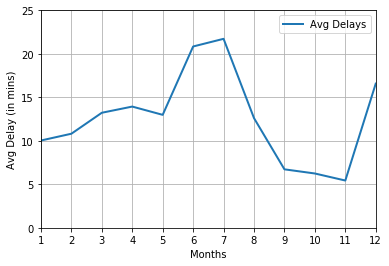

In [272]:

#plot the data by averaging the departure delay by months
plt.plot(flights_df.groupby(['month'])['dep_delay'].mean(), label = "Avg Delays",linewidth =2.0)

#set the x-axis label to months
plt.xlabel('Months')

#set the x-axis to not plot 0 month
plt.xlim(1,12)

#increase the number of visible ticks to individual months to show all months
plt.xticks(range(1,13))

#set the y-label to average delay 
plt.ylabel('Avg Delay (in mins)')

#set the limits of y-axis
plt.ylim(0,25)

#set the grid to true
plt.grid(True)

#plot legends
plt.legend()


There is no seasonal pattern as such in the departure delays. 
The departure delay keeps on steadily increasing from Winter(January to March) until April then it starts to decrease only to shoot up in Summer. We observe high departure delays in the starting months of summers June and July. From July onwards the average departure delay decreases and shoots up in December.

(d) On average, how do departure delays vary over the course of a day?

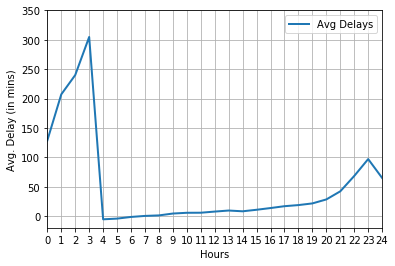

In [279]:
#plot the data by averaging the departure delay by months
plt.plot(flights_df.groupby(['hour'])['dep_delay'].mean(), label = "Avg Delays",linewidth =2.0)

#set the y-label to average delay 
plt.ylabel('Avg. Delay (in mins)')

#set the limits of y-axis
plt.ylim(-20,350)

#set the x-axis label to hours
plt.xlabel('Hours')

#set the x-axis to hours limit of 0-23 
plt.xlim(0,23)

#increase the number of visible ticks to individual hour to show all hours
plt.xticks(range(0,25))

#set the grid to true
plt.grid(True)

#plot legends
plt.legend()

Post-midnight the average departure delays keeps on increasing until 3 AM. After that we observe a very steep decline and the flights tend to depart early(-ve average departure delay) until 6 AM. There after, we observe steady increase in the departure delays

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [276]:
#compute the speed variable. Divide the time by 60 because we are now 
#considering the speed which is measured in miles per hour
flights_df['speed'] = flights_df.distance / (flights_df.air_time/60)

#Find the row with the maximum flight speed
flights_df[(flights_df.speed == flights_df.speed.max())]



,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,703.384615


 Flight number 1499 flying from LaGuardia to Atlanta on 25th May flew the fastest with a speed of 703.38 MPH.